In [179]:
%run SAT_help_functions.ipynb
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

In [2]:
x = get_Weibull(t,a=param.loc[i,"Boundary Separation Speed"],
              a_prime=param.loc[0,"aprimeSpeed"],
              lam=param.loc[0,"lamSpeed"],k=3)
y = get_Weibull(t,a=param.loc[0,"Boundary Separation Speed"],
              a_prime=param.loc[0,"aprimeSpeed"],
              lam=param.loc[0,"lamSpeed"],k=3)

NameError: name 'get_Weibull' is not defined

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1.95) / 2., n-1)
    return m, m-h, m+h

In [184]:
def get_Weibull(t,a=2,a_prime=1.5,lam=1,k=3):
    first = 1-np.exp(-(t/lam)**k)
    second = a - a_prime
    return (a - first*second)
      
class BoundCollapsingWeibull(Bound):
    name = "Weibull CDF collapsing bounds"
    required_parameters = ["a", "aprime", "lam", "k"]
    def get_bound(self, t, **kwargs):

        l = self.lam
        a = self.a
        aprime = self.aprime
        k = self.k
            
        return a - (1 - np.exp(-(t/l)**k)) * (a - aprime)

def plot_boundary(ax,dataset):
    
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    t = np.arange(0,5,0.01)

    param = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresult"+dataset+".csv") 
    param_mean = param.mean(axis = 0)
    a_speed = np.zeros((len(param),len(t)))
    a_acc = np.zeros((len(param),len(t)))

    for i in range(len(param)):
        a_speed[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Speed"],a_prime=param.loc[i,"aprimeSpeed"],
                                     lam=param.loc[i,"lamSpeed"],k=param.loc[i,"kSpeed"])
        a_acc[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Accuracy"],a_prime=param.loc[i,"aprimeAcc"],
                                   lam=param.loc[i,"lamAcc"],k=param.loc[i,"kAcc"])
    ax.plot(t, a_speed.mean(axis = 0), color="#0E8585")
    ax.plot(t, a_acc.mean(axis = 0), color="#830783")
    ax.plot(t, -a_speed.mean(axis = 0), color="#0E8585")
    ax.plot(t, -a_acc.mean(axis = 0), color="#830783")
    
    t_val = scipy.stats.t.ppf((1.95) / 2., len(param)-1)
    constant = t_val/len(param)**0.5
    #speed
    ax.fill_between(t, (a_speed.mean(axis = 0)-a_speed.std(axis = 0)*constant), (a_speed.mean(axis = 0)+a_speed.std(axis = 0)*constant), color='#CCE5E5', alpha=.7)
    ax.fill_between(t, -(a_speed.mean(axis = 0)-a_speed.std(axis = 0)*constant), -(a_speed.mean(axis = 0)+a_speed.std(axis = 0)*constant), color='#CCE5E5', alpha=.7)

    #acc
    ax.fill_between(t, (a_acc.mean(axis = 0)-a_acc.std(axis = 0)/len(param)**0.5), (a_acc.mean(axis = 0)+a_acc.std(axis = 0)/len(param)**0.5), color='#E5CCE5', alpha=.7)
    ax.fill_between(t, -(a_acc.mean(axis = 0)-a_acc.std(axis = 0)/len(param)**0.5), -(a_acc.mean(axis = 0)+a_acc.std(axis = 0)/len(param)**0.5), color='#E5CCE5', alpha=.7)

    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.axis('off')
    #print(param["aprimeAcc"].mean(axis = 0))
    #t_max = next(a[0] for a in enumerate(a_acc.mean(axis = 0)) if abs(a[1]-param_mean["aprimeAcc"]) < 0.1)
    #ax.set_xlim(0,t[t_max])
    ax.set_xlim(0,0.5)
    if dataset=="Lerche2017":
        ax.set_xlim(0,5)
    # plot trajectories
    #for j in range(20):
        
    #    evidence_a = get_DDMWeibull_traj(drift=param_mean["Drift Rate Accuracy"],
     #                                    a=param_mean["Boundary Separation Accuracy"],
    #                                     aprime=param_mean["aprimeAcc"],
     #                                    lam = param_mean["lamAcc"], 
     #                                    k = param_mean["kAcc"],
     #                                    ter=param_mean["Non-decision Time Accuracy"],seed=j+1)
     #   print(evidence_a)
     #   ax.plot(t[0:len(evidence_a[:-2])], evidence_a[:-2], color = '#CCE5E5')

        
    return ax

def plot_all_boundaries(xlabelsize=15, titlesize = 20, figsize=(28, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_boundary(ax = axes[i],dataset = datasets[i])
        axes[i].set_title("")
        axes[i].set_ylabel("Boundaries", fontsize=10, fontname='Arial')
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        
    axes[0].text(x=-0.1, y=-0.5,s="Boundaries",size=20, rotation = "vertical")

    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.03, 1), fontsize=10, frameon=False)

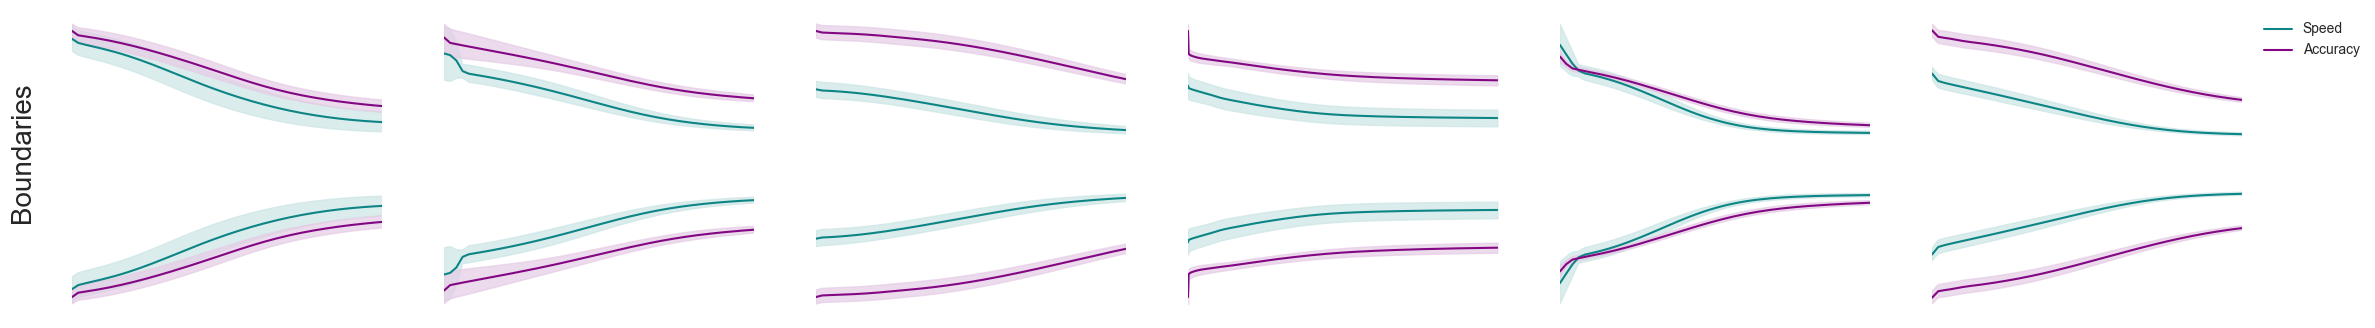

In [6]:
plot_all_boundaries()

In [188]:
def get_Weibull(t,a=2,a_prime=1.5,lam=1,k=3):
    first = 1-np.exp(-(t/lam)**k)
    second = a - a_prime
    return (a - first*second)

In [189]:
def get_Weibull(t,a=2,aprime=1.5,lam=1,k=3):

    return a - (1 - np.exp(-(t/lam)**k)) * (a - aprime)
      
class BoundCollapsingWeibull(Bound):
    name = "Weibull CDF collapsing bounds"
    required_parameters = ["a", "aprime", "lam", "k"]
    def get_bound(self, t, **kwargs):

        l = self.lam
        a = self.a
        aprime = self.aprime
        k = self.k
            
        return a - (1 - np.exp(-(t/l)**k)) * (a - aprime)
    
def get_DDMWeibull_traj(drift,a,aprime,lam, k,ter=0,T_dur = 5,seed=1):
    
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=drift),
                  noise=NoiseConstant(noise=1),
                  bound=BoundCollapsingWeibull(a=a,aprime=aprime,lam=lam,k=k),
                  overlay=OverlayNonDecision(nondectime=ter),
                  dx=.001, dt=.001, T_dur=T_dur)
    evidence = model.simulate_trial(seed=seed)
    return evidence

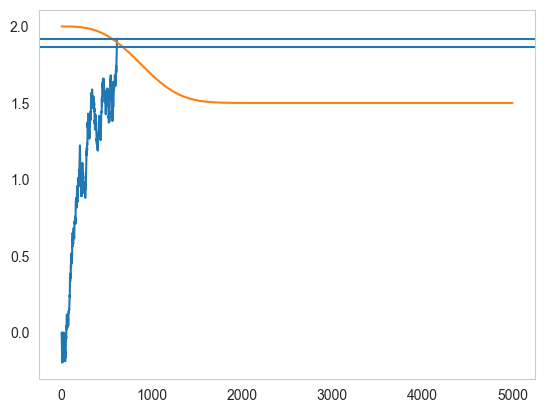

In [190]:
traj = get_DDMWeibull_traj(drift=1,a=2,aprime=1.5,lam=1,k=3,ter=0,T_dur = 5,seed=1)
t = np.arange(0,5,0.001)
bound = get_Weibull(t,a=2,aprime=1.5,lam=1,k=3)
plt.plot(traj)
plt.plot(bound)

# second last position
plt.axhline(traj[-2])

# last position
plt.axhline(traj[-1])

In [218]:


def plot_boundary(ax,dataset):
    
    if ax is None:
        ax = plt.gca()
    t = np.arange(0,5,0.001)

    param = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresult"+dataset+".csv") 
    param_mean = param.mean(axis = 0)
    a_speed = np.zeros((len(param),len(t)))
    a_acc = np.zeros((len(param),len(t)))

    for i in range(len(param)):
        a_speed[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Speed"],aprime=param.loc[i,"aprimeSpeed"],
                                     lam=param.loc[i,"lamSpeed"],k=param.loc[i,"kSpeed"])
        a_acc[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Accuracy"],aprime=param.loc[i,"aprimeAcc"],
                                   lam=param.loc[i,"lamAcc"],k=param.loc[i,"kAcc"])
        
    a_speed_mean = get_Weibull(t,a=param_mean["Boundary Separation Speed"],aprime=param_mean["aprimeSpeed"],
                                     lam=param_mean["lamSpeed"],k=param_mean["kSpeed"])
    a_acc_mean = get_Weibull(t,a=param_mean["Boundary Separation Accuracy"],aprime=param_mean["aprimeAcc"],
                                     lam=param_mean["lamAcc"],k=param_mean["kAcc"])
    ax.plot(t, a_speed_mean, color="#0E8585")
    ax.plot(t, a_acc_mean, color="#830783")
    ax.plot(t, -a_speed_mean, color="#0E8585")
    ax.plot(t, -a_acc_mean, color="#830783")
    
    #t_val = scipy.stats.t.ppf((1.95) / 2., len(param)-1)
    #constant = t_val/len(param)**0.5
    #speed
    ax.fill_between(t, (a_speed.mean(axis = 0)-a_speed.std(axis = 0)), (a_speed.mean(axis = 0)+a_speed.std(axis = 0)), color='#CCE5E5', alpha=.7)
    ax.fill_between(t, -(a_speed.mean(axis = 0)-a_speed.std(axis = 0)), -(a_speed.mean(axis = 0)+a_speed.std(axis = 0)), color='#CCE5E5', alpha=.7)

    #acc
    ax.fill_between(t, (a_acc.mean(axis = 0)-a_acc.std(axis = 0)), (a_acc.mean(axis = 0)+a_acc.std(axis = 0)), color='#E5CCE5', alpha=.5)
    ax.fill_between(t, -(a_acc.mean(axis = 0)-a_acc.std(axis = 0)), -(a_acc.mean(axis = 0)+a_acc.std(axis = 0)), color='#E5CCE5', alpha=.5)

    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.axis('off')
    #print(param["aprimeAcc"].mean(axis = 0))
    t_max = next(a[0] for a in enumerate(a_acc_mean) if abs(a[1]-param_mean["aprimeAcc"]) < 0.03)
    ax.set_xlim(0,t[t_max])
    #ax.set_xlim(0,0.8)
    #if dataset=="Lerche2017":
    #    ax.set_xlim(0,4)
    
    # plot trajectories
    for j in range(10):
        
        evidence_a = get_DDMWeibull_traj(drift=param_mean["Drift Rate Accuracy"],
                                         a=param_mean["Boundary Separation Accuracy"],
                                         aprime=param_mean["aprimeAcc"],
                                         lam = param_mean["lamAcc"], 
                                         k = param_mean["kAcc"],
                                         ter=0,seed=j+1)  #param_mean["Non-decision Time Accuracy"]
        #print(len(evidence_a))
        #print(len(t))
        #print(evidence_a)
        smaller_num = min(len(evidence_a[:-2]), len(t)-1)
        ax.plot(t[0:smaller_num], evidence_a[0:smaller_num],color = "grey",alpha = 0.5)

    a = "$a_s$ =" + str(round(param_mean["Boundary Separation Speed"],2))+", $a_a$ = "+str(round(param_mean["Boundary Separation Accuracy"],2))
    aprime = "$a^\prime_s$ =" + str(round(param_mean["aprimeSpeed"],2))+", $a^\prime_a$ = "+str(round(param_mean["aprimeAcc"],2))
    lam = "$\lambda_s$ =" + str(round(param_mean["lamSpeed"],2))+", $\lambda_a$ = "+str(round(param_mean["lamAcc"],2))
    
    ax.set_title(a + "\n"+aprime+"\n"+lam, fontsize = 20)
    return ax

def plot_all_boundaries(xlabelsize=15, titlesize = 20,axes = None):
    sns.set_style("whitegrid", {'axes.grid' : False})
    for i in range(6):
        plot_boundary(ax = axes[i],dataset = datasets[i])
        #axes[i].set_title("")
        axes[i].set_ylabel("Boundaries", fontsize=10, fontname='Arial')
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        
    #axes[0].text(x=-0.1, y=-0.5,s="Boundaries",size=20, rotation = "vertical")

    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=16, frameon=False)

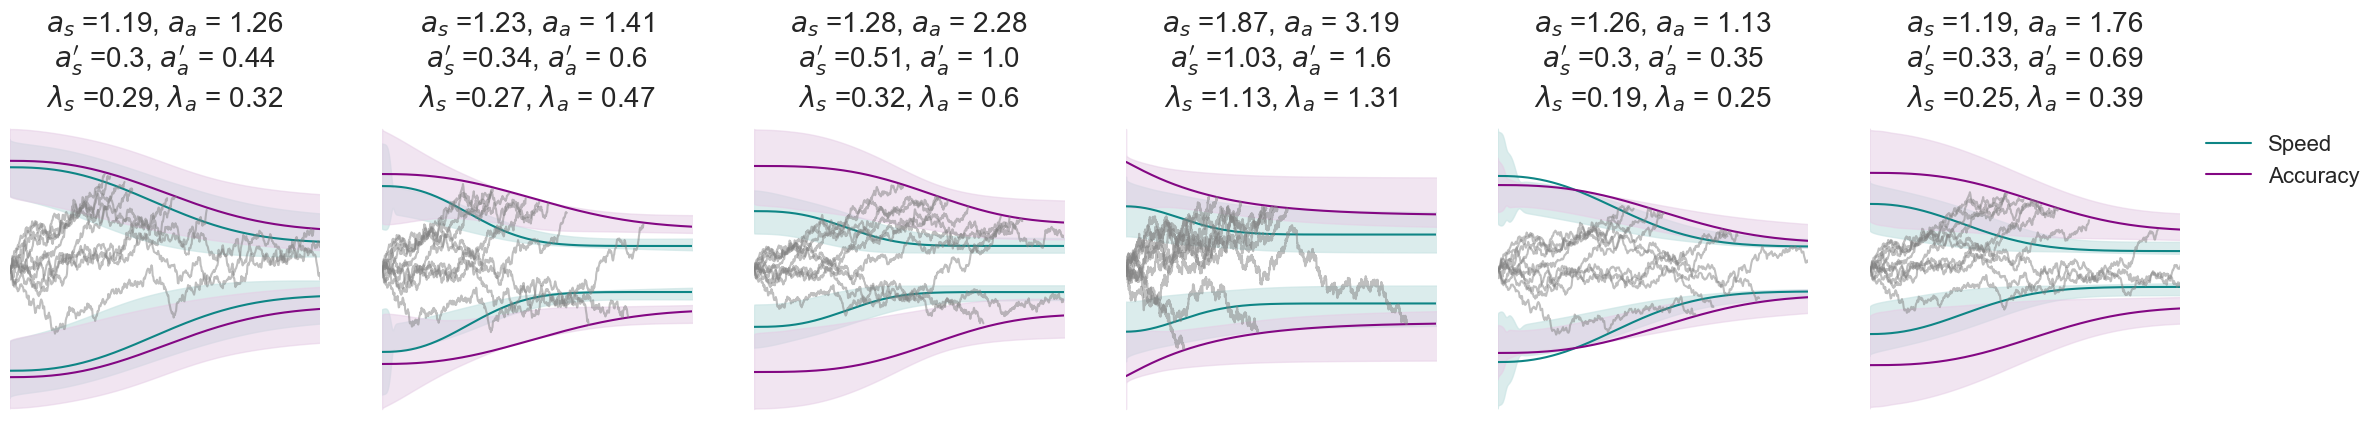

In [206]:
figure, axes = plt.subplots(1,6,figsize=(28, 4))

plot_all_boundaries(axes=axes)

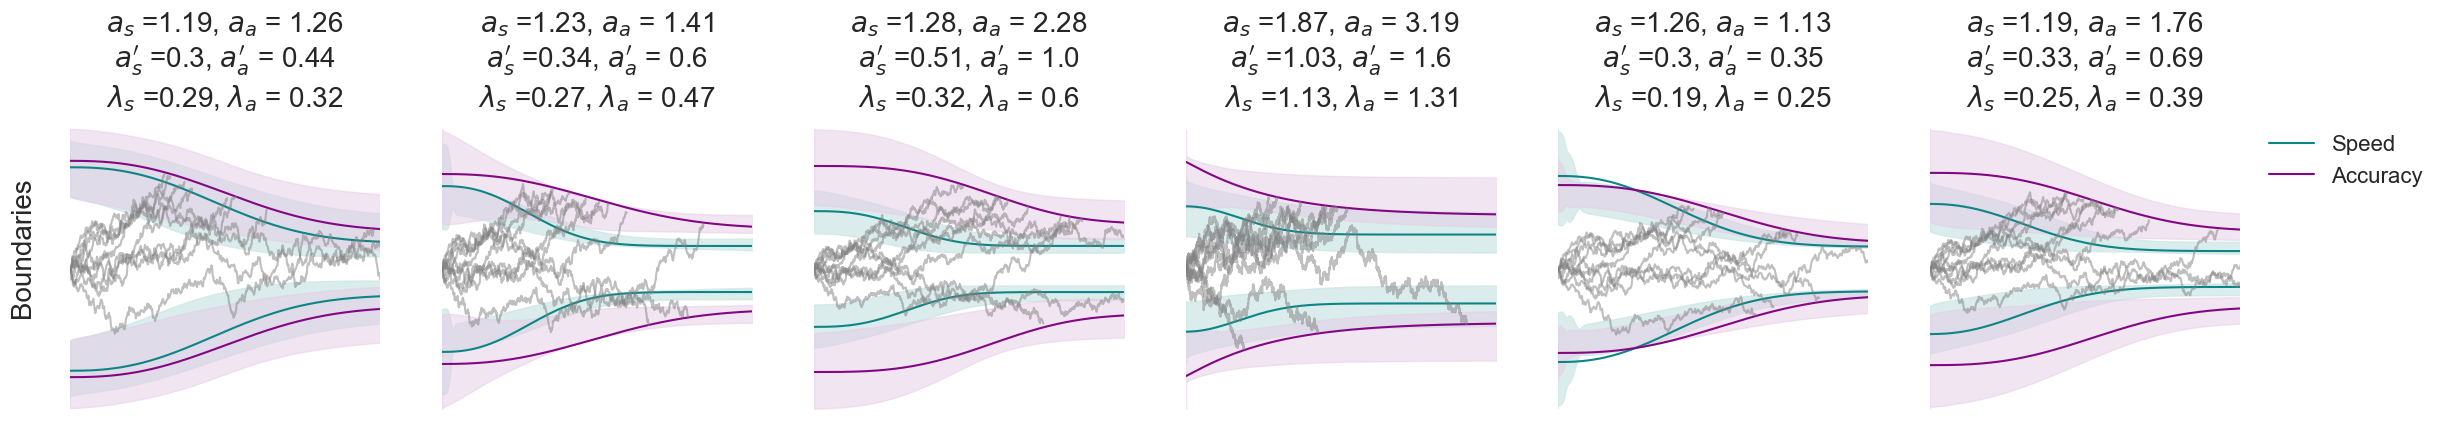

In [12]:
figure, axes = plt.subplots(1,6,figsize=(28, 4))

plot_all_boundaries(axes=axes)

In [81]:


def plot_boundary(ax,dataset):
    
    if ax is None:
        ax = plt.gca()
    t = np.arange(0,5,0.001)

    param = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresult"+dataset+".csv") 
    param_mean = param.mean(axis = 0)
    a_speed = np.zeros((len(param),len(t)))
    a_acc = np.zeros((len(param),len(t)))

    for i in range(len(param)):
        a_speed[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Speed"],aprime=param.loc[i,"aprimeSpeed"],
                                     lam=param.loc[i,"lamSpeed"],k=param.loc[i,"kSpeed"])
        a_acc[i,:] = get_Weibull(t,a=param.loc[i,"Boundary Separation Accuracy"],aprime=param.loc[i,"aprimeAcc"],
                                   lam=param.loc[i,"lamAcc"],k=param.loc[i,"kAcc"])
        
    a_speed_mean = get_Weibull(t,a=param_mean["Boundary Separation Speed"],aprime=param_mean["aprimeSpeed"],
                                     lam=param_mean["lamSpeed"],k=param_mean["kSpeed"])
    a_acc_mean = get_Weibull(t,a=param_mean["Boundary Separation Accuracy"],aprime=param_mean["aprimeAcc"],
                                     lam=param_mean["lamAcc"],k=param_mean["kAcc"])
    
    speed_ndt_b = np.ones(int(param_mean["Non-decision Time Speed"]//0.001))*param_mean["Boundary Separation Speed"]
    acc_ndt_b = np.ones(int(param_mean["Non-decision Time Accuracy"]//0.001))*param_mean["Boundary Separation Accuracy"]
    
    ax.plot(t, np.concatenate((speed_ndt_b, a_speed_mean))[0:len(t)], color="#0E8585") 
    ax.plot(t, np.concatenate((acc_ndt_b,a_acc_mean))[0:len(t)], color="#830783")
    ax.plot(t, -np.concatenate((speed_ndt_b, a_speed_mean))[0:len(t)], color="#0E8585")
    ax.plot(t, -np.concatenate((acc_ndt_b,a_acc_mean))[0:len(t)], color="#830783")
    
    #t_val = scipy.stats.t.ppf((1.95) / 2., len(param)-1)
    #constant = t_val/len(param)**0.5
    #speed
    ax.fill_between(t, (a_speed.mean(axis = 0)-a_speed.std(axis = 0)), (a_speed.mean(axis = 0)+a_speed.std(axis = 0)), color='#CCE5E5', alpha=.7)
    ax.fill_between(t, -(a_speed.mean(axis = 0)-a_speed.std(axis = 0)), -(a_speed.mean(axis = 0)+a_speed.std(axis = 0)), color='#CCE5E5', alpha=.7)

    #acc
    ax.fill_between(t, (a_acc.mean(axis = 0)-a_acc.std(axis = 0)), (a_acc.mean(axis = 0)+a_acc.std(axis = 0)), color='#E5CCE5', alpha=.5)
    ax.fill_between(t, -(a_acc.mean(axis = 0)-a_acc.std(axis = 0)), -(a_acc.mean(axis = 0)+a_acc.std(axis = 0)), color='#E5CCE5', alpha=.5)

    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.axis('off')
    #print(param["aprimeAcc"].mean(axis = 0))
    t_max = next(a[0] for a in enumerate(a_acc_mean) if abs(a[1]-param_mean["aprimeAcc"]) < 0.03)
    ax.set_xlim(0,t[t_max])
    #ax.set_xlim(0,0.8)
    #if dataset=="Lerche2017":
    #    ax.set_xlim(0,4)
    
    # plot trajectories
    for j in range(10):
        
        evidence_a = get_DDMWeibull_traj(drift=param_mean["Drift Rate Accuracy"],
                                         a=param_mean["Boundary Separation Accuracy"],
                                         aprime=param_mean["aprimeAcc"],
                                         lam = param_mean["lamAcc"], 
                                         k = param_mean["kAcc"],
                                         ter=param_mean["Non-decision Time Accuracy"],seed=j+1) 
        #print(len(evidence_a))
        #print(len(t))
        #print(evidence_a)
        smaller_num = min(len(evidence_a[:-2]), len(t)-1)
        ax.plot(t[0:smaller_num], evidence_a[0:smaller_num],color = "grey",alpha = 0.5)

    #aprime_s = param_mean["aprimeSpeed"], aprime_a = param_mean["aprimeAcc"], 
    #lam_s = param_mean["lamSpeed"], lam_a = param_mean["lamAcc"]
    a = "$a_s$ =" + str(round(param_mean["Boundary Separation Speed"],2))+", $a_a$ = "+str(round(param_mean["Boundary Separation Accuracy"],2))
    aprime = "$a^\prime_s$ =" + str(round(param_mean["aprimeSpeed"],2))+", $a^\prime_a$ = "+str(round(param_mean["aprimeAcc"],2))
    lam = "$\lambda_s$ =" + str(round(param_mean["lamSpeed"],2))+", $\lambda_a$ = "+str(round(param_mean["lamAcc"],2))
    
    ax.set_title(a + "\n"+aprime+"\n"+lam, fontsize = 20)
        
    return ax

def plot_all_boundaries(xlabelsize=15, titlesize = 20, figsize=(28, 4),axes = None):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_boundary(ax = axes[i],dataset = datasets[i])
        #axes[i].set_title("")
        axes[i].set_ylabel("Boundaries", fontsize=10, fontname='Arial')
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        
    #axes[0].text(x=-0.1, y=-0.5,s="Boundaries",size=20, rotation = "vertical")

    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.03, 1), fontsize=10, frameon=False)

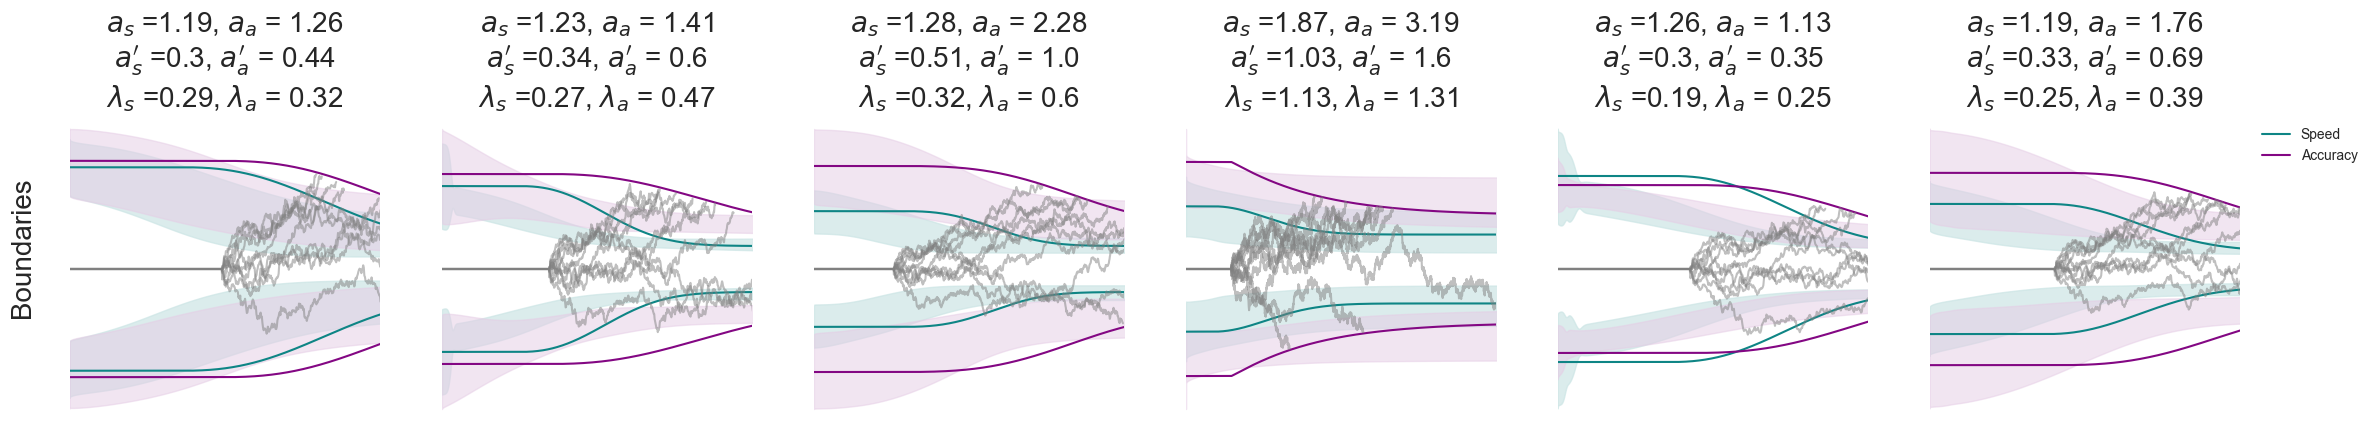

In [266]:
plot_all_boundaries()

In [24]:
def get_OUM_traj(drift,a,k,ter=0.3,T_dur = 5,seed=1):
    
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=drift,x = k, t = 0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=a),
                  overlay=OverlayNonDecision(nondectime=ter),
                  dx=.001, dt=.001, T_dur=T_dur)
    evidence = model.simulate_trial(seed=seed)
    return evidence

<Axes: title={'center': 'Ornstein-Uhlenbeck Model'}>

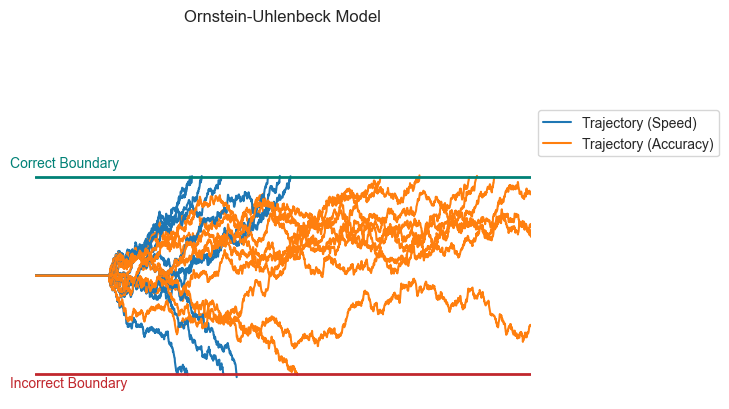

In [14]:
def plot_OUM_trajs_dataset(ax=None):
    if ax is None:
        ax = plt.gca()

    
    for i in range(10):
        ## speed
        evidence = get_OUM_traj(drift=0.3,a=2,k=3,ter=0.3,seed=i+1)
        t = np.arange(len(evidence))/1000
        ax.plot(t,evidence, color = '#1f77b4')
        
        ## accuracy
        evidence = get_OUM_traj(drift=0.3,a=2,k=0,ter=0.3,seed=i+1)
        t = np.arange(len(evidence))/1000
        ax.plot(t,evidence, color = '#ff7f0e')

    # boundaries
    ax.axhline(y = 2, color = '#008176',linewidth = 2)
    ax.text(x=-0.1, y=2.2, s = "Correct Boundary", color = '#008176')

    ax.axhline(y = -2, color = '#c1272d',linewidth = 2)
    ax.text(x=-0.1, y=-2.26, s = "Incorrect Boundary", color = '#c1272d')

    # plot limit
    ax.set_xlim(0,2)
    ax.set_ylim(-2.5,5)
    ax.axis('off')
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.set_title("Ornstein-Uhlenbeck Model")
    
    # legend
    #line1 = ax.axhline(y = 200, color = '#006CD1',linewidth = 2, linestyle = 'dashed',label = "Effective Drift Rate (Speed)")
    #line2 = ax.axhline(y = 200, color = '#006CD1',linewidth = 2, label = "Effective Drift Rate (Accuracy)")

    #ax.legend(handles=[line1, line2], loc = "upper left",markerscale=0.1)
    ax.legend(labels =["Trajectory (Speed)", "Trajectory (Accuracy)"], loc='upper left', bbox_to_anchor=(1, 0.8),fontsize=10)

    return(ax)
plot_OUM_trajs_dataset()

In [17]:
dx = (v+k*x)*dt

NameError: name 'v' is not defined

In [57]:
def get_OUM_traj_without_noise(drift,a,k,ter=0.3,dt=0.001,T_dur = 5):
    
    
    xs = [0]
    x = 0
    while x<a and x>-a:
        if len(xs) > T_dur/dt:
            break
        x += (drift+k*x)*dt
        xs.append(x)
        
    return xs

In [13]:
param = pd.read_csv("Parameter Estimates/OUM2v2k2terresultDutilh2013.csv")             

param.loc[2]

Unnamed: 0                      0.000000
Drift Rate Speed                0.000000
Drift Rate Accuracy             0.000000
Self-excitation Speed           2.647640
Self-excitation Accuracy        3.417140
Boundary Separation             1.592860
Non-decision Time Speed         0.109843
Non-decision Time Accuracy      0.512854
BIC                           571.790022
Name: 2, dtype: float64

In [ ]:
evidence_s = get_OUM_traj_without_noise(drift=param.loc[i,"Drift Rate Speed"],a=param.loc[i,"Boundary Separation"],
                                  k=param.loc[i,"Self-excitation Speed"],ter=param.loc[i,"Non-decision Time Speed"],
                                   dt = dt,T_dur=5)/param.loc[i,"Boundary Separation"]

In [15]:
def plot_OUM_trajs_dataset(dataset, dt = 0.001, T_dur=5, ax=None):
    if ax is None:
        ax = plt.gca()
    param = pd.read_csv("Parameter Estimates/OUM2v2k2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    #print(param_mean)
    if dataset == "Lerche2017":
        dt = 0.01
        T_dur = 40
        #print(param)
        param_mean = param.loc[4]
    
    for i in range(len(param)):
        evidence_s = get_OUM_traj_without_noise(drift=param.loc[i,"Drift Rate Speed"],a=param.loc[i,"Boundary Separation"],
                                          k=param.loc[i,"Self-excitation Speed"],ter=param.loc[i,"Non-decision Time Speed"],
                                           dt = dt,T_dur=5)/param.loc[i,"Boundary Separation"]

        evidence_a = get_OUM_traj_without_noise(drift=param.loc[i,"Drift Rate Accuracy"],a=param.loc[i,"Boundary Separation"],
                                          k=param.loc[i,"Self-excitation Accuracy"],ter=param.loc[i,"Non-decision Time Accuracy"],
                                           dt = dt,T_dur=5)/param.loc[i,"Boundary Separation"]



        evidence_s=int(np.floor(param.loc[i,"Non-decision Time Speed"]*1000))*[0]+list(evidence_s)
        evidence_a=int(np.floor(param.loc[i,"Non-decision Time Accuracy"]*1000))*[0]+list(evidence_a)


        ax.plot(evidence_s, color = '#CCE5E5')
        ax.plot(evidence_a, color = '#E5CCE5')
        
    evidence_s_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Speed"],ter=param_mean["Non-decision Time Speed"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]

    evidence_a_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Accuracy"],ter=param_mean["Non-decision Time Accuracy"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]
    evidence_s_ave=int(np.floor(param_mean["Non-decision Time Speed"]*1000))*[0]+list(evidence_s_ave)
    evidence_a_ave=int(np.floor(param_mean["Non-decision Time Accuracy"]*1000))*[0]+list(evidence_a_ave)

    ax.plot(evidence_s_ave, color = '#0E8585')
    ax.plot(evidence_a_ave, color = '#830783')
    
    # boundaries
    ax.axhline(y = 1, color = 'black',linewidth = 2)
    ax.axhline(y = -1, color = 'black',linewidth = 2)

    # plot limit
    #ax.set_xlim(0,2)
    #ax.set_ylim(-2.5,5)

    ax.set_title("Ornstein-Uhlenbeck Model")
    
    return ax
#plot_OUM_trajs_dataset("Dutilh2013")

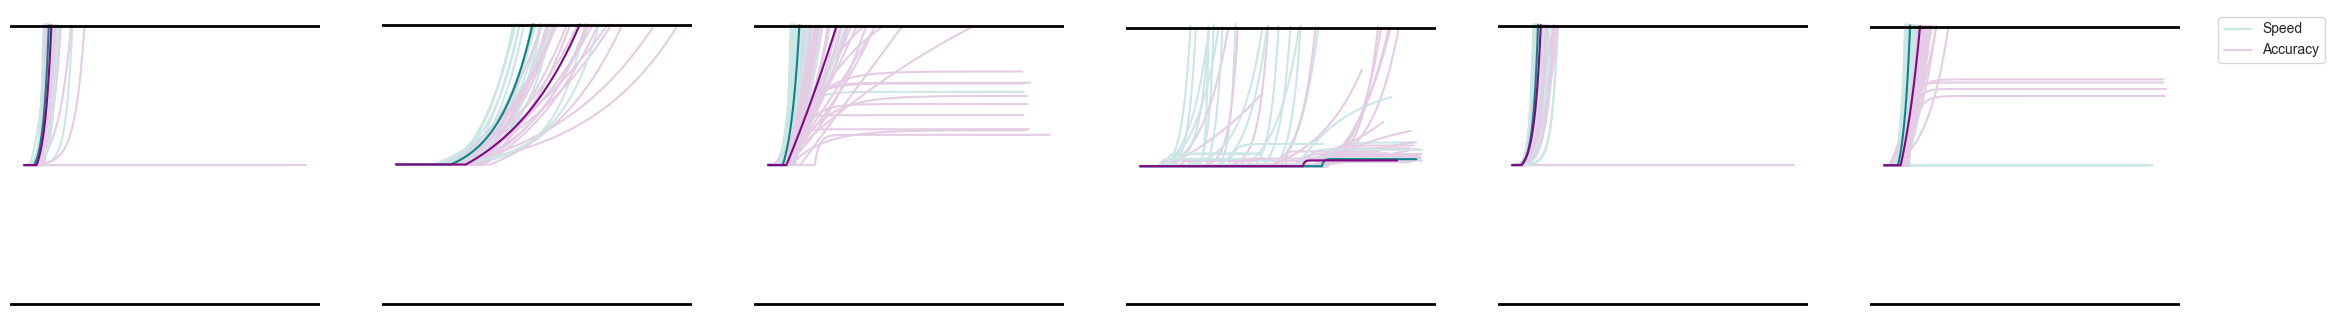

In [19]:
def plot_all_OUM_traj(xlabelsize=15, titlesize = 20, figsize=(28, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)

    for i in range(6):
        plot_OUM_trajs_dataset(ax = axes[i],dataset = datasets[i])
        axes[i].set_title("")
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        #axes[i].set_xlabel("Time", fontsize = xlabelsize, fontname='Arial')
        #axes[i].set_xlim(0,t_max)
        #axes[i].set_ylim(0,3.5)
        axes[i].axis('off')
        axes[i].tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
        
        #axes[i].tick_params(axis='both', which='major', labelsize=7)
   
    #axes[0].text(x=-150, y=0,s="Trajectories",size=20, rotation = "vertical")
    axes[0].set_ylabel("Trajectories", fontsize = xlabelsize, fontname='Arial')
        
    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.1, 1),fontsize=10)
plot_all_OUM_traj()

In [230]:
param_mean

Unnamed: 0                        0.000000
Drift Rate Speed                  1.537792
Drift Rate Accuracy               2.570616
Boundary Separation Speed         1.188845
aprimeSpeed                       0.303102
lamSpeed                          0.293923
kSpeed                            2.471205
Boundary Separation Accuracy      1.263965
aprimeAcc                         0.437331
lamAcc                            0.318226
kAcc                              2.476737
Non-decision Time Speed           0.185461
Non-decision Time Accuracy        0.253942
BIC                            -404.432191
dtype: float64

In [84]:
def get_OUM_traj(drift,a,k,ter=0.3,T_dur = 5,seed=1):
    
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=drift,x = k, t = 0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=a),
                  overlay=OverlayNonDecision(nondectime=ter),
                  dx=.001, dt=.001, T_dur=T_dur)
    evidence = model.simulate_trial(seed=seed)
    return evidence

def plot_OUM_trajs_dataset_with_noise(dataset, dt = 0.001, T_dur=5, ax=None):
    if ax is None:
        ax = plt.gca()
    param = pd.read_csv("Parameter Estimates/OUM2v2k2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    #print(param_mean)
    if dataset == "Lerche2017":
        #dt = 0.01
        T_dur = 30
        #print(param)
        param_mean = param.loc[6]
        
        
    #plot average
    evidence_s_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Speed"],ter=param_mean["Non-decision Time Speed"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]

    evidence_a_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Accuracy"],ter=param_mean["Non-decision Time Accuracy"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]
    
    evidence_s_ave=int(np.floor(param_mean["Non-decision Time Speed"]*1000))*[0]+list(evidence_s_ave)
    evidence_a_ave=int(np.floor(param_mean["Non-decision Time Accuracy"]*1000))*[0]+list(evidence_a_ave)

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # plot trajectories
    for j in range(20):
        evidence_s = get_OUM_traj(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation"],
                                k=param_mean["Self-excitation Speed"],ter=param_mean["Non-decision Time Speed"],seed=j+1)/param_mean["Boundary Separation"]
        evidence_a = get_OUM_traj(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation"],
                                k=param_mean["Self-excitation Accuracy"],ter=param_mean["Non-decision Time Accuracy"],seed=j+1)/param_mean["Boundary Separation"]

        ax.plot(evidence_s[:-2], color = '#CCE5E5')
        ax.plot(evidence_a[:-2], color = '#E5CCE5')
        

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # boundaries
    ax.axhline(y = 1, color = 'black',linewidth = 2)
    ax.axhline(y = -1, color = 'black',linewidth = 2)

    # plot limit
    #ax.set_xlim(0,2)
    #ax.set_ylim(-2.5,5)
    
    k = "$k_s$ =" + str(round(param_mean["Self-excitation Speed"],2))+", $k_a$ = "+str(round(param_mean["Self-excitation Accuracy"],2))
    
    
    ax.set_title(k, fontsize = 20)

    return ax
#plot_OUM_trajs_dataset("Dutilh2013")

In [210]:
def plot_all_OUM_traj_with_noise(xlabelsize=15, titlesize = 20,axes = None):
    sns.set_style("whitegrid", {'axes.grid' : False})
    #figure, axes = plt.subplots(1,6,figsize=figsize)

    for i in range(6):
        plot_OUM_trajs_dataset_with_noise(ax = axes[i],dataset = datasets[i])
        #axes[i].set_title("")
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        #axes[i].set_xlabel("Time", fontsize = xlabelsize, fontname='Arial')
        #axes[i].set_xlim(0,t_max)
        #axes[i].set_ylim(0,3.5)
        axes[i].axis('off')
        #axes[i].tick_params(left = False, right=False, bottom = False, top = False,
        #                    labelleft = False, labelbottom = False)
        #axes[i].tick_params(axis='both', which='major', labelsize=7)
   
    #axes[0].text(x=-130, y=-0.5,s="Trajectories",size=20, rotation = "vertical")
    #axes[0].set_ylabel("Trajectories", fontsize = xlabelsize, fontname='Arial')
        
    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)


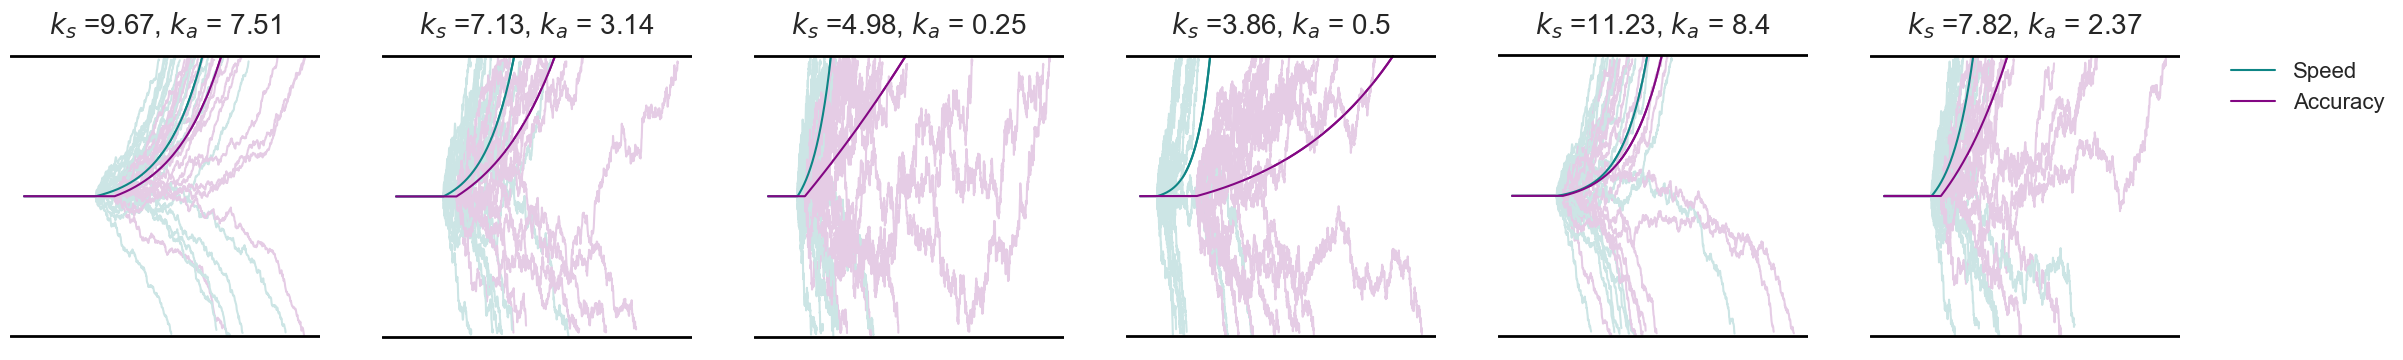

In [86]:

figure, axes = plt.subplots(1,6,figsize=(28, 4))
plot_all_OUM_traj_with_noise(axes=axes)

In [20]:
def plot_OUM_trajs_dataset_with_noise_wo_ndt(dataset, dt = 0.001, T_dur=5, ax=None):
    if ax is None:
        ax = plt.gca()
    param = pd.read_csv("Parameter Estimates/OUM2v2k2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    print(param_mean)
    #print(param_mean)
    if dataset == "Lerche2017":
        #dt = 0.01
        T_dur = 30
        #print(param)
        param_mean = param.loc[6]
        
        
    #plot average
    evidence_s_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Speed"],ter=param_mean["Non-decision Time Speed"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]

    evidence_a_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation"],
                                          k=param_mean["Self-excitation Accuracy"],ter=param_mean["Non-decision Time Accuracy"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation"]
    
    evidence_s_ave=list(evidence_s_ave)
    evidence_a_ave=list(evidence_a_ave)

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # plot trajectories
    for j in range(20):
        evidence_s = get_OUM_traj(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation"],
                                k=param_mean["Self-excitation Speed"],ter=0,seed=j+1)/param_mean["Boundary Separation"]
        evidence_a = get_OUM_traj(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation"],
                                k=param_mean["Self-excitation Accuracy"],ter=0,seed=j+1)/param_mean["Boundary Separation"]

        ax.plot(evidence_s[:-2], color = '#CCE5E5')
        ax.plot(evidence_a[:-2], color = '#E5CCE5')
        

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # boundaries
    ax.axhline(y = 1, color = 'black',linewidth = 2)
    ax.axhline(y = -1, color = 'black',linewidth = 2)

    # plot limit
    #ax.set_xlim(0,2)
    #ax.set_ylim(-2.5,5)

    ax.set_title("Ornstein-Uhlenbeck Model")
    
    return ax
#plot_OUM_trajs_dataset("Dutilh2013")

In [21]:
def plot_OUM_trajs_dataset_with_noise_wo_ndt(dataset, dt = 0.001, T_dur=5, ax=None):
    if ax is None:
        ax = plt.gca()
    param = pd.read_csv("Parameter Estimates/OUM2v2a2k2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    print(param_mean)
    #print(param_mean)
    if dataset == "Lerche2017":
        #dt = 0.01
        T_dur = 30
        #print(param)
        param_mean = param.loc[6]
        
        
    #plot average
    evidence_s_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation Speed"],
                                          k=param_mean["Self-excitation Speed"],ter=param_mean["Non-decision Time Speed"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation Speed"]

    evidence_a_ave = get_OUM_traj_without_noise(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation Accuracy"],
                                          k=param_mean["Self-excitation Accuracy"],ter=param_mean["Non-decision Time Accuracy"],
                                           dt = dt,T_dur=5)/param_mean["Boundary Separation Accuracy"]
    
    evidence_s_ave=list(evidence_s_ave)
    evidence_a_ave=list(evidence_a_ave)

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # plot trajectories
    for j in range(20):
        evidence_s = get_OUM_traj(drift=param_mean["Drift Rate Speed"],a=param_mean["Boundary Separation Speed"],
                                k=param_mean["Self-excitation Speed"],ter=0,seed=j+1)/param_mean["Boundary Separation Speed"]
        evidence_a = get_OUM_traj(drift=param_mean["Drift Rate Accuracy"],a=param_mean["Boundary Separation Accuracy"],
                                k=param_mean["Self-excitation Accuracy"],ter=0,seed=j+1)/param_mean["Boundary Separation Accuracy"]

        ax.plot(evidence_s[:-2], color = '#CCE5E5')
        ax.plot(evidence_a[:-2], color = '#E5CCE5')
        

    ax.plot(evidence_s_ave[:-2], color = '#0E8585')
    ax.plot(evidence_a_ave[:-2], color = '#830783')
    
    # boundaries
    ax.axhline(y = 1, color = 'black',linewidth = 2)
    ax.axhline(y = -1, color = 'black',linewidth = 2)

    # plot limit
    #ax.set_xlim(0,2)
    #ax.set_ylim(-2.5,5)

    ax.set_title("Ornstein-Uhlenbeck Model")
    
    return ax
#plot_OUM_trajs_dataset("Dutilh2013")

In [75]:
def plot_all_OUM_traj_with_noise(xlabelsize=15, titlesize = 20, figsize=(28, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)

    for i in range(6):
        plot_OUM_trajs_dataset_with_noise_wo_ndt(ax = axes[i],dataset = datasets[i])
        axes[i].set_title("")
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        #axes[i].set_xlabel("Time", fontsize = xlabelsize, fontname='Arial')
        #axes[i].set_xlim(0,t_max)
        #axes[i].set_ylim(0,3.5)
        axes[i].axis('off')
        #axes[i].tick_params(left = False, right=False, bottom = False, labelleft = False, labelbottom = False)

        #axes[i].tick_params(axis='both', which='major', labelsize=7)
   
    axes[0].text(x=-130, y=-0.5,s="Trajectories",size=20, rotation = "vertical")
    #axes[0].set_ylabel("Trajectories", fontsize = xlabelsize, fontname='Arial')
        
    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.1, 1),fontsize=10, frameon=False)


In [34]:
%matplotlib inline

In [ ]:
axes[i].text(x=5,y=0,s="Participants",fontsize=20, horizontalalignment='center',verticalalignment='center')


array([  8. , -11.5, -31. , -50.5, -70. , -89.5])

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


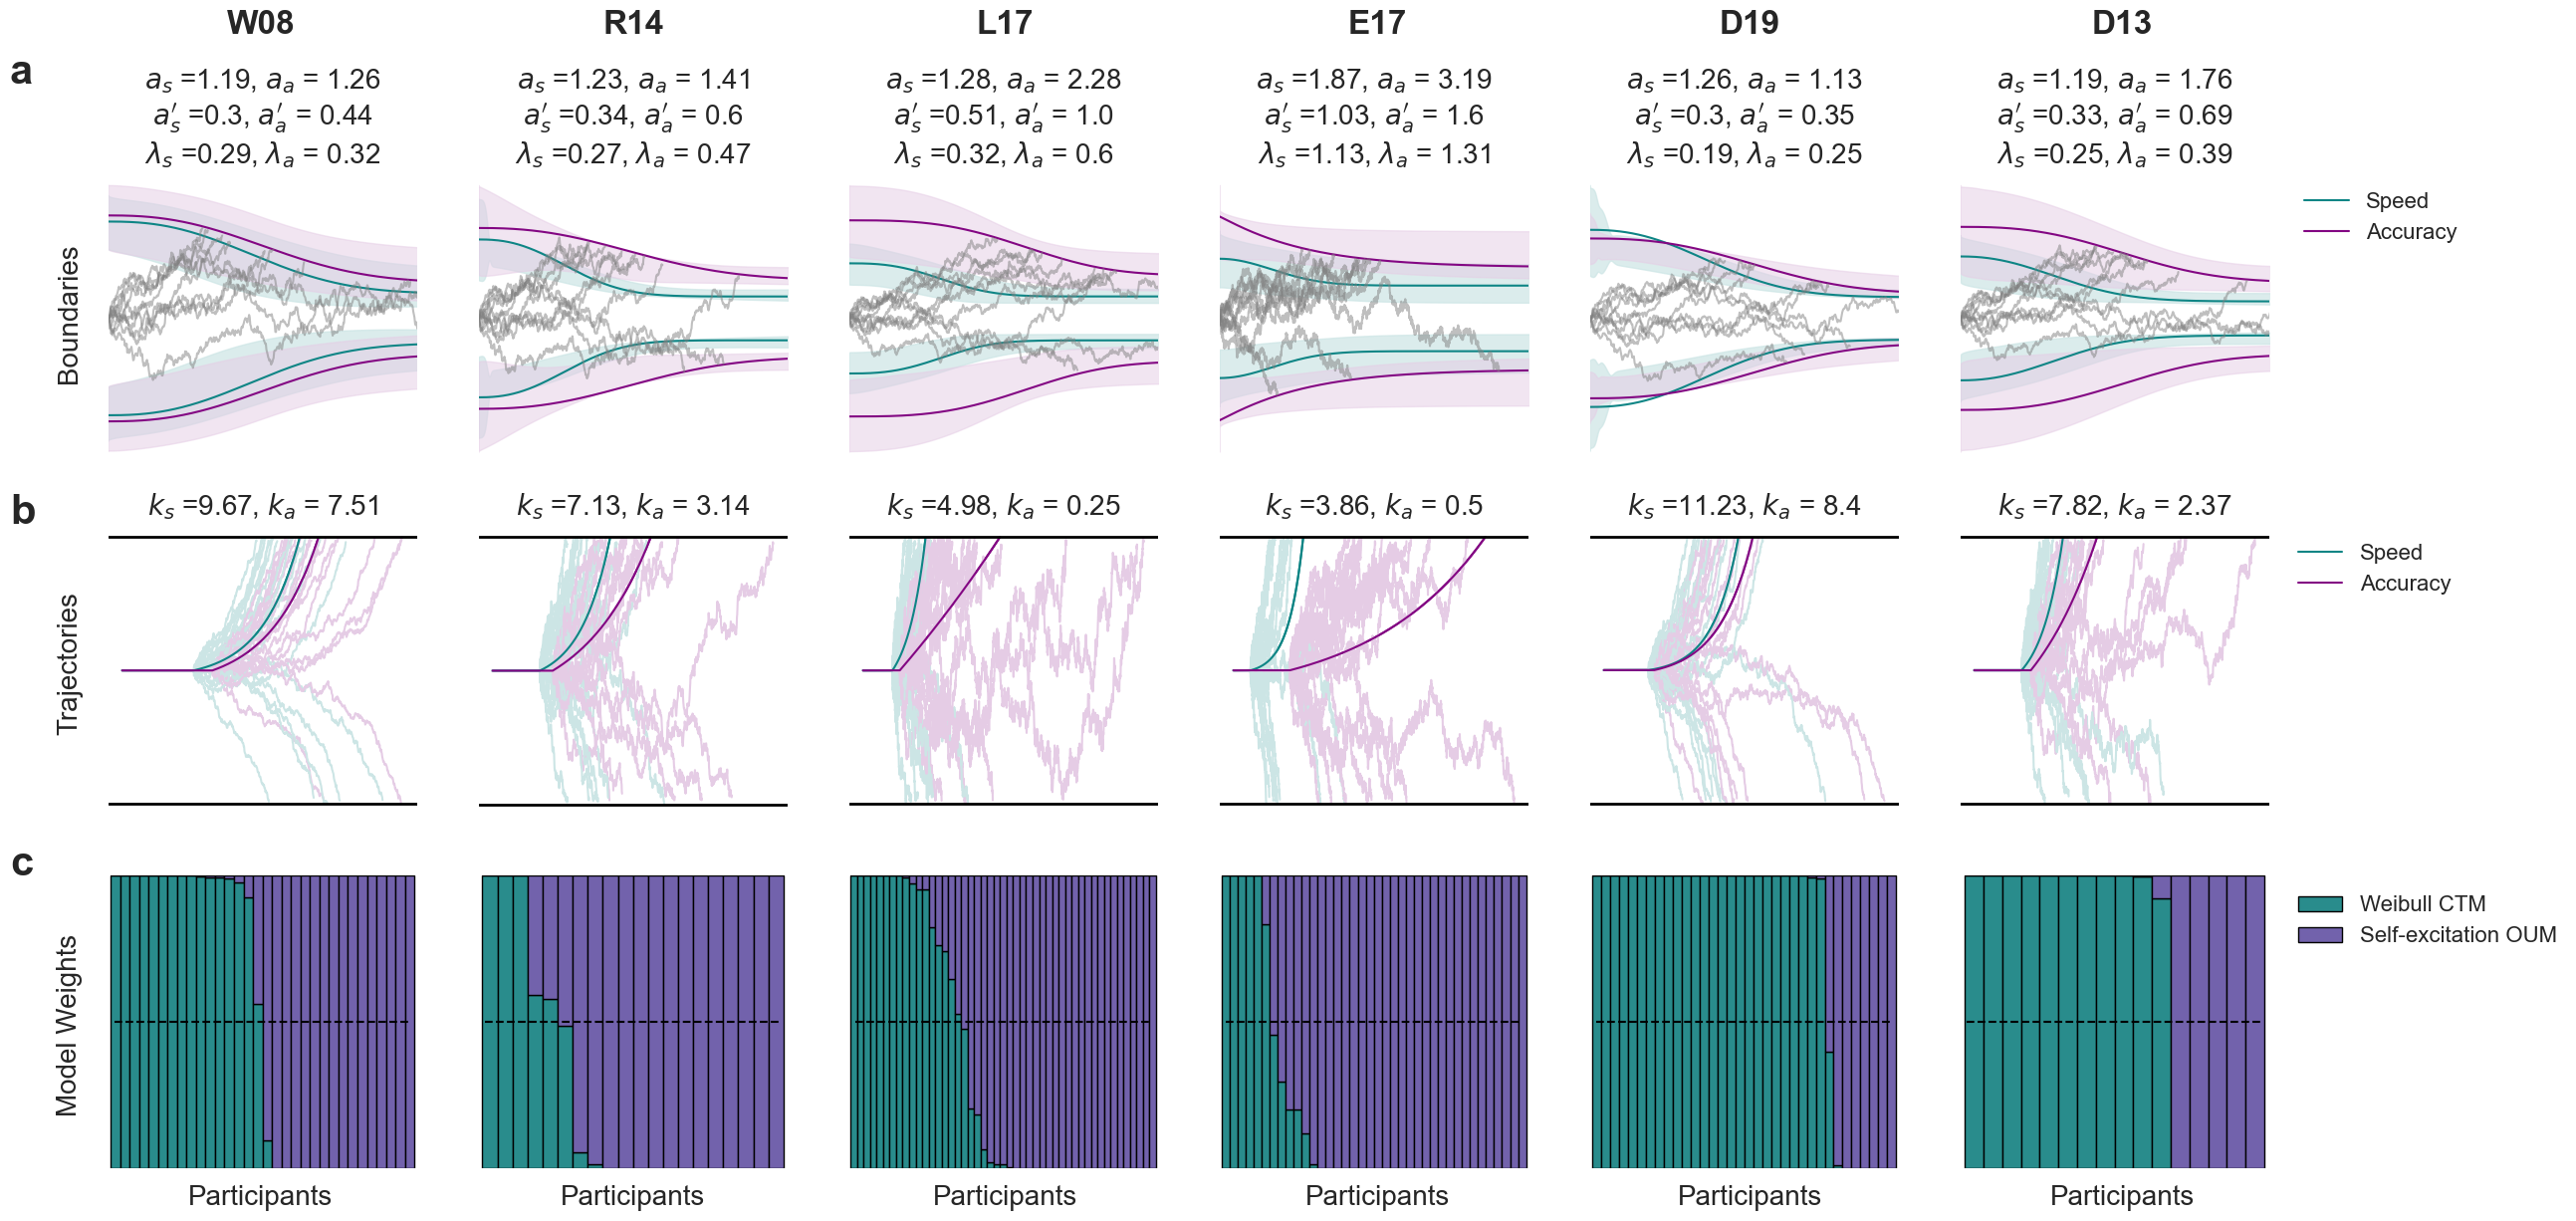

In [222]:

figure, axes = plt.subplots(3, 6,figsize=(28, 13))
plot_all_boundaries(axes=axes[0,:])
plot_all_OUM_traj_with_noise(axes=axes[1,:])
#axes[0,5].get_legend().remove()

models = ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] 
labels = ["Weibull CTM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat_fig(models, labels, sortby = "OUM2v2k2ter", axes=axes[2,:])
plt.text(x=-102.5, y=2.7,s="Boundaries",size=20, rotation = "vertical")
plt.text(x=-102.5, y=1.5,s="Trajectories",size=20, rotation = "vertical")
plt.text(x=-102.5, y=0.2,s="Model Weights",size=20, rotation = "vertical")

plt.text(x=-105,y=3.7, s="a", fontsize = 30, weight='bold')
plt.text(x=-105,y=2.2, s="b", fontsize = 30, weight='bold')
plt.text(x=-105,y=1, s="c", fontsize = 30, weight='bold')

loc = -np.arange(6)*19.9+7.9
for i in range(6):
    plt.text(x=loc[i], y=-0.1,s="Participants",size=20, horizontalalignment='center',verticalalignment='center')

    plt.text(x=loc[i], y=3.9,s=dataset_names[i],size=24, horizontalalignment='center',verticalalignment='center',weight='bold')



plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig5.pdf",bbox_inches = 'tight')


In [221]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            #BIC_all[model] = get_BIC_EJ(model)
            #print(pd.read_csv("Parameter Estimates/"+model+"Combinedresult"+dataset+".csv"))
            BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"Combinedresult"+dataset+".csv")[['BIC']]#1
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Research_on_SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"result"+dataset+".csv")[['BIC']]#2
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min
    #return BIC_all
    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)
    BIC_all = BIC_all.reset_index(drop=True)
    BIC_all.index += 1
    if models==["DDM2v2a2ter","OUM2v2k2ter"]:
        color=["#4d7b93", "#7262ac"]#["#0E8585", "#7262ac"] #["#ff7f0e", "#1f77b4"] 7E4909
    elif models==["OUM2v2a2ter","OUM2v2k2ter"]:
        color= ["#b45dbb",'#7262ac'] #["#cfcfe5",'#7262ac'] #["#a1c9f4",'#1f77b4']
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"]:
        color=["#a1c9f4",'#699ADD','#1f77b4'] #3179C6 88BDDF
    #elif models == ["OUM2v2a2k2ter","OUM2v2k2ter"]:
    #    color=['#699ADD','#1f77b4']
    elif models == ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] :
        color= ["#298c8c", "#7262ac"]#["#2e974e", "#7262ac"] #["#F29A2E", "#1f77b4"]
    else:
        color= ["#b45dbb",'#7262ac'] 
    

    return BIC_all.plot(ax = ax, kind='bar', legend =False, stacked=True, width=1,edgecolor='black'
                        ,color=color)

# DDM vs OUMk    ["#ff7f0e", "#1f77b4"]

# OUMa vs OUMk   ["#a1c9f4",'#1f77b4']

# DDMc vs OUMk   ["#F29A2E", "#1f77b4"]


In [154]:
def plot_all_datasets_flat_fig(models, labels, sortby, xlabelsize=20, titlesize = 24, figsize=(30, 4),axes = None):
    ticks = [0, 0.5, 1]
    sns.set_style("whitegrid", {'axes.grid' : False})
    #figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, weight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        if i==5: # avoid weird legend
            axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)

        axes[i].axhline(y=0.5,xmin=0.02,xmax=0.98,linestyle="--",color='black') 
        axes[i].tick_params(axis='y', which='major', labelsize=16)
        axes[i].tick_params(left = False, right=False, bottom = False, 
                            labelright = False, labelleft = False, labelbottom = False)

        #axes[i].tick_params(axis='x', which='major', labelsize=7)
        axes[i].axis('off')
        #axes[i].set_yticks(ticks)
        #axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    #axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    
    #axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10, frameon=False)
